# &#x1F4DD; REPORT

## &#x0031;&#xFE0F;&#x20E3; Receiver for NR Primary Synchronization Signals (PSS)

### &#x0031;&#xFE0F;&#x20E3;.&#x0031;&#xFE0F;&#x20E3; PSS signals

We are concerned with complex baseband equivalent transmit signals of the form 

$$\tilde{S}_{PSS,i}(n) = \sum_k x_i(n − kN), i = 0, 1, 2 \qquad \qquad (1) $$

where $N$ is the periodicity of the PSS signals which is $10^{−2} \mathit{f_s}$ samples and $\mathit{f_s}$ is the sampling frequency. The PSS is part of a more complex signal called the SSB (Synchronization Signal Block) and there can be more than one in a period of 5ms depending on the antenna configuration, but here we will assume a simple scenario with a single SSB and therefore a single PSS as described in (1). $i$ is the index of the transmitted PSS signal and can have one of three values. In the context of this lab session, we will assume that the receiver uses a sampling frequency of $\mathit{f_s} = 61.44 × 10^6 samples/s$. $x_i(n)$ is the PSS signal itself which is of duration $N_{PSS} = 2048 + 144 = 2192$ samples. We will see later (after completing this lab session) that $2048$ is the OFDM symbol size in samples and $144$ is the cyclic prefix length.

#### &#x0031;&#xFE0F;&#x20E3;.&#x0031;&#xFE0F;&#x20E3;.&#x0031;&#xFE0F;&#x20E3; Questions

&#x1F4D1; Note: Conventions used in this report

To facilitate the reading and help with the signal processing content, an effort has been made to correlate all Mathematical Symbols to the programming language itself. Julia has been selected since it helps coding Math Symbols (using LaTeX) by incorporating unicode encoding at its core.

In [1]:
using Plots
using FFTW
using LinearAlgebra

In [2]:
include("../modules/operations.jl");

&#x1F4D1; Note: the `operations.jl` source code helps writing mathematical symbols:
For example:
- `𝓕` refers to the `fft(.)` function (Fourier Transform)
- `𝓕⁻¹` refers to the `ifft(.)` function (inverse Fourier Transform)
- the convolution symbol `⊗` refers to the `conv(a,b)` function, it is a binary (infix) function
- the reverse symbol `⦰` refers to the `reverse(.)` function, prepares for convolution operation
- the concatenation symbol `⧺` is used to make a vertical concatenation operation, `vcat(.)` function
- the transpose symbol `(.)ᵀ` is used to transpose a vector/matrix, refers to the `transpose(.)` function
- the conjugate symbol `(.)ˣ` is used to apply the complex conjugate operation on a vector/matrix, `conj(.)` function
- the hermitian symbol `(.)ꜛ` is used to apply the complex conjugate transpose operation

In [3]:
using LaTeXStrings

&#x1F4D1; Note: Greek letters are used wherever it makes sense

- along with the greek letters, LaTeX notations are extensively incorporated.
- this with the hope to better correlate the Mathematical symbols and notations used in different documents

##### &#x0031;&#xFE0F;&#x20E3; Using the supplied MATLAB file (pss.m) plot the real, imaginary components and magnitude of the one of the PSS signals. What do you see?

&#x1F4D1; Note: Data Processing &#x1F9FB;

the `Julia` files translating the `MATLAB` files are located under the `../data/julia` directory. The `Julia` files are just converting the `im` imaginary `MATLAB`'s keyword to a `j` imaginary keyword in `Julia`. 

Below a Julia source code example: 

```julia
# utility tools
# convert imaginary component from Matlab to Julia
j = im
include(("../matlab/pss0.m"))
```

The original `MATLAB` files are located under the `../matlab` folder and have `NOT` been modified nor altered. 

In [4]:
include("../data/julia/pss0.jl");

&#x1F4D1; Note: Plotting `raw` data received from the MATLAB files

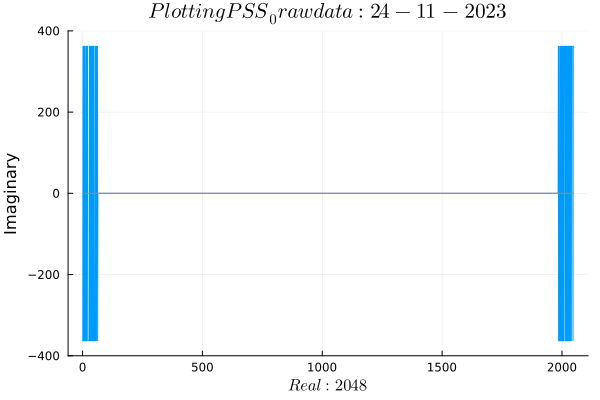

In [5]:
# Plot the result
date = "24-11-2023"

# pss2_real_plot = 
plot(Re(pss_0)
    , xlabel="Real"
    , ylabel="Imaginary"
    , title=latexstring("Plotting PSS_0  raw data: ", date)
    , label="I"
    , legend=:topright
    , ylim=(-400, 400)
)
# savefig(pss2_real_plot,"images/pss2_real_plot.png");

plot!(Im(pss_0)
    , legend = :false
    , xlabel = latexstring("Real: ", length(pss_0))
    , label="Q"
)

In [6]:
@show pss_0[end]; # Let's view the last value from the raw data

pss_0[end] = 362 + 0im


&#x1F4D1; Note: Reading the paramaters given by the TP1 handout

In [7]:
𝑓ₛ = 61.44 * 1e6; @show 𝑓ₛ # samples/s
Nᵨ = 1e-2; @show Nᵨ # typed \N\_rho for ratio to the sampling frequency in samples/s
𝑁τ = Nᵨ * 𝑓ₛ ; @show 𝑁τ; # Periodicity 
𝐶ₚ = 144; # Cyclic Prefix
𝑁ₚₛₛ = length(pss_0) + 𝐶ₚ; @show 𝑁ₚₛₛ; # Duration = PSS Signal + Cyclic Prefix samples

𝑓ₛ = 6.144e7
Nᵨ = 0.01
𝑁τ = 614400.0
𝑁ₚₛₛ = 2192


In [8]:
## convert the pss_0 raw signal in time domain
## 𝑆ₚₛₛ is the synchronization signal sequence
sₚₛₛ⁰ = pss_0; @show sₚₛₛ⁰[end] # File Handle
sₚₛₛ⁰ = 𝓕⁻¹(sₚₛₛ⁰); # s in time-domain
sₚₛₛ⁰ ./= |₂(sₚₛₛ⁰); # Normalize the arrays ||sₚₛₛ⁰||₂
sₚₛₛ⁰ = sₚₛₛ⁰[(end-143):end] ⧺ sₚₛₛ⁰ ; @show size(sₚₛₛ⁰); # :end is 2048 in this case, concat math 

sₚₛₛ⁰[end] = 362 + 0im
size(sₚₛₛ⁰) = (2192,)


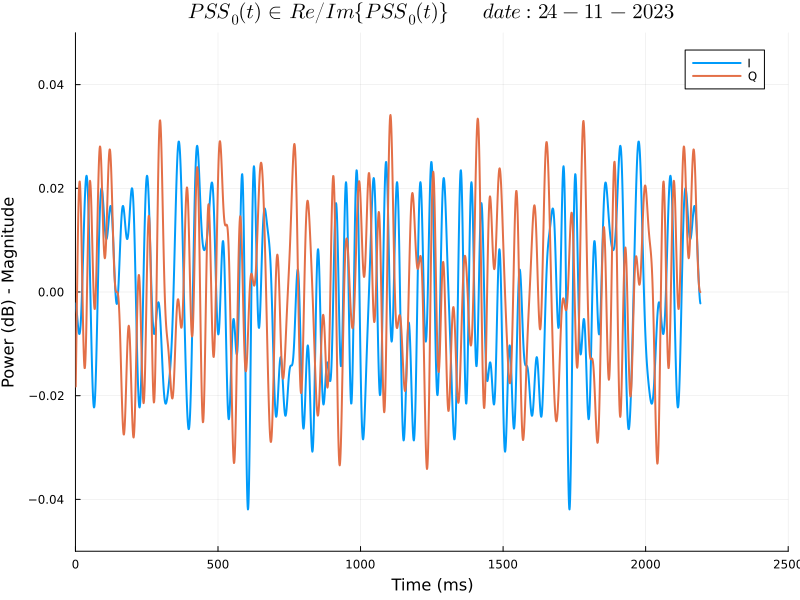

In [9]:
# Plot real part
plot(Re(sₚₛₛ⁰)
    , xlabel="Time (ms)"
    , ylabel="Power (dB) - Magnitude"
    , title=latexstring("PSS_0(t) \\in {Re}/{Im} \\{PSS_0(t)\\} \\qquad date:", date)
    , label="I"
    , legend=:topright
    , ylims = (-0.05, 0.05)
    , xlims = (0,2500)
    , linewidth = 2
)

# Plot imaginary part
plot!(Im(sₚₛₛ⁰)
    , label="Q"
    , linewidth = 2
    , size = ( 800, 600 )
)

##### &#x0032;&#xFE0F;&#x20E3; Plot the power spectrum of the PSS signal on a dB-scale (using the MATLAB FFT). Estimate the bandwidth as closely as possible (in terms of physical frequencies). What do you observe about the PSS signal?

&#x2753;&#2757; TBD Check if 1-index based `fftshift((0:𝑁ₚₛₛ-1)...`

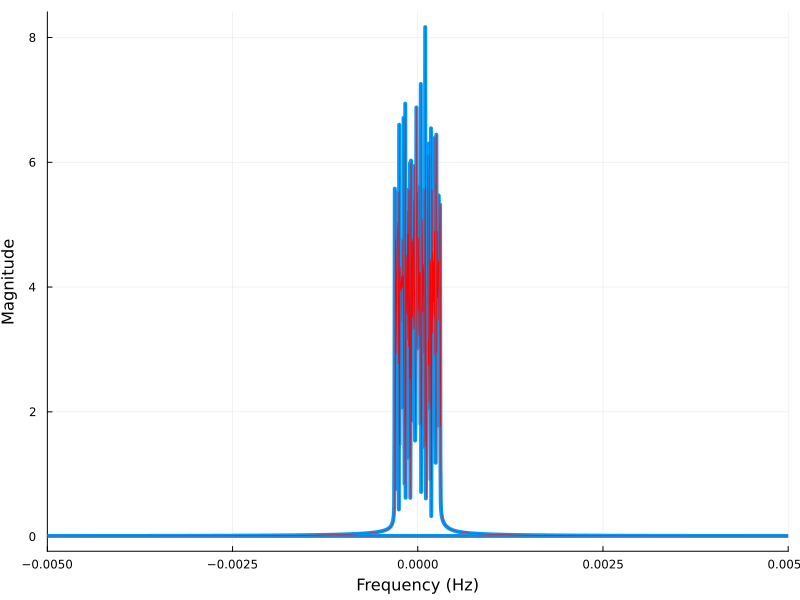

In [10]:
# Compute the frequencies corresponding to the FFT result
tₚₛₛ = fftshift((0:𝑁ₚₛₛ-1) .- 𝑁ₚₛₛ/2) / 𝑁ₚₛₛ * Nᵨ # frequencies 0-index based

# s (small s) will be transformed to Slanted 𝓢 (fourier transform) in frequency domain
𝓢ₚₛₛ⁰ = 𝓕(sₚₛₛ⁰) # Compute the Fourier transform of the signal

tₚₛₛ1 = fftshift((1:𝑁ₚₛₛ) .- 𝑁ₚₛₛ/2) / 𝑁ₚₛₛ * Nᵨ # frequencies 1-index based

# Plot the magnitude spectrum
plot(tₚₛₛ
    , abs.(𝓢ₚₛₛ⁰) # In absolute values
    , xlabel="Frequency (Hz)"
    , ylabel="Magnitude"
    , xlims = (-Nᵨ/2, Nᵨ/2) # Set limits to focus on the main lobe
    , legend=false
    , linewidth = 4
    , size = ( 800, 600 )
)
plot!(tₚₛₛ1
    , abs.(𝓢ₚₛₛ⁰) # In absolute values
    , xlabel="Frequency (Hz)"
    , ylabel="Magnitude"
    , xlims = (-Nᵨ/2, Nᵨ/2) # Set limits to focus on the main lobe
    , legend=false
    , linewidth = .5
    , size = ( 800, 600 )
    , color = :red
)


##### &#x0033;&#xFE0F;&#x20E3; Plot the three auto-correlation functions and the three cross-correlation functions. To what extent can we say that these three signals are orthogonal? When using one PSS as a basis function, what is the ratio of signal energy to interference in dB if we assume that these are orthogonal?


In [11]:
using DSP

In [12]:
pss_00 = DSP.xcorr(pss_0,pss_0); plot00 = plot(abs.(pss_00), label="pss_00", title = "Correlate raw data");

In [13]:
include("../data/julia/pss1.jl");

In [14]:
pss_01 = DSP.xcorr(pss_0,pss_1); plot01 = plot(abs.(pss_01), label="pss_01");

In [15]:
include("../data/julia/pss2.jl");

In [16]:
pss_02 = DSP.xcorr(pss_0,pss_2); plot02 = plot(abs.(pss_02), label="pss_02");

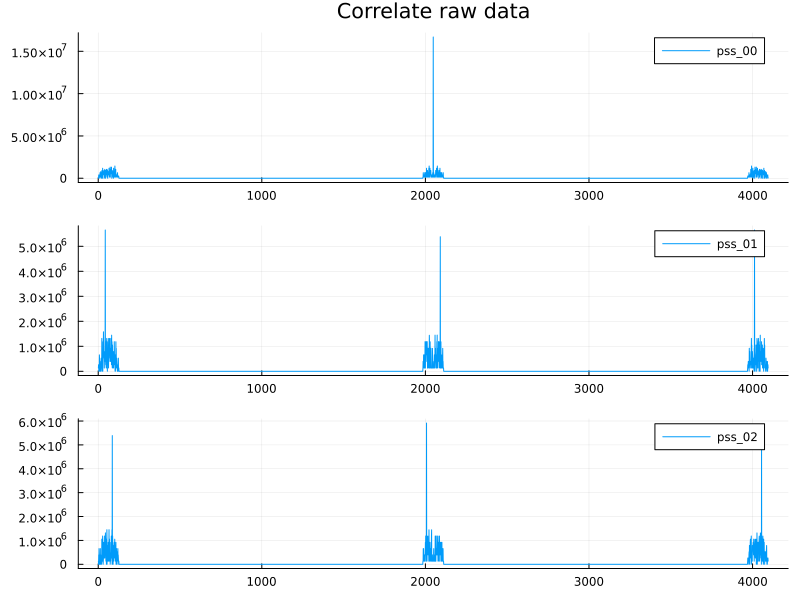

In [17]:
# Arrange subplots in a grid
plot(plot00
    , plot01
    , plot02    
    , layout=(3, 1)
    , legend = :topright
    , size = ( 800, 600 )
)

In [18]:
# pss00 = xcorr(pss0_t,pss0_t); plot(abs(pss00))
PSS₀₀ = DSP.xcorr(sₚₛₛ⁰,sₚₛₛ⁰); plot_pss00 = plot(abs.(PSS₀₀), label="PSS₀₀", lw = 2, title = "Correlate time-domain signals");

In [19]:
## convert the pss_1 signal in time domain
sₚₛₛ¹ = pss_1; # File Handle
sₚₛₛ¹ = 𝓕⁻¹(sₚₛₛ¹); # (inverse fourier transform) in time domain
sₚₛₛ¹ ./= |₂(sₚₛₛ¹) ;# Normalize the arrays
sₚₛₛ¹ = sₚₛₛ¹[(end-143):end] ⧺ sₚₛₛ¹ ; @show size(sₚₛₛ¹); # end is 2048 in this case, concat math 

size(sₚₛₛ¹) = (2192,)


In [20]:
# pss01 = xcorr(pss0_t,pss1_t); plot(10*log10(abs(pss01)))
PSS₀₁ = DSP.xcorr(sₚₛₛ⁰,sₚₛₛ¹); plot_pss01 = plot(10 * log10.(abs.(PSS₀₁)), label="PSS₀₁");

In [21]:
## convert the pss_2 signal in time domain
sₚₛₛ² = pss_2; # File Handle
sₚₛₛ² = 𝓕⁻¹(sₚₛₛ²); # (inverse fourier transform) in time domain
sₚₛₛ² ./= |₂(sₚₛₛ²); # Normalize the arrays
sₚₛₛ² = sₚₛₛ²[(end-143):end] ⧺ sₚₛₛ² ; @show size(sₚₛₛ²); # end is 2048 in this case, concat math 

size(sₚₛₛ²) = (2192,)


In [22]:
# pss02 = xcorr(pss0_t,pss2_t); plot(10*log10(abs(pss02)))
PSS₀₂ = DSP.xcorr(sₚₛₛ⁰,sₚₛₛ²); plot_pss02 = plot(10 * log10.(abs.(PSS₀₂)), label="PSS₀₂");

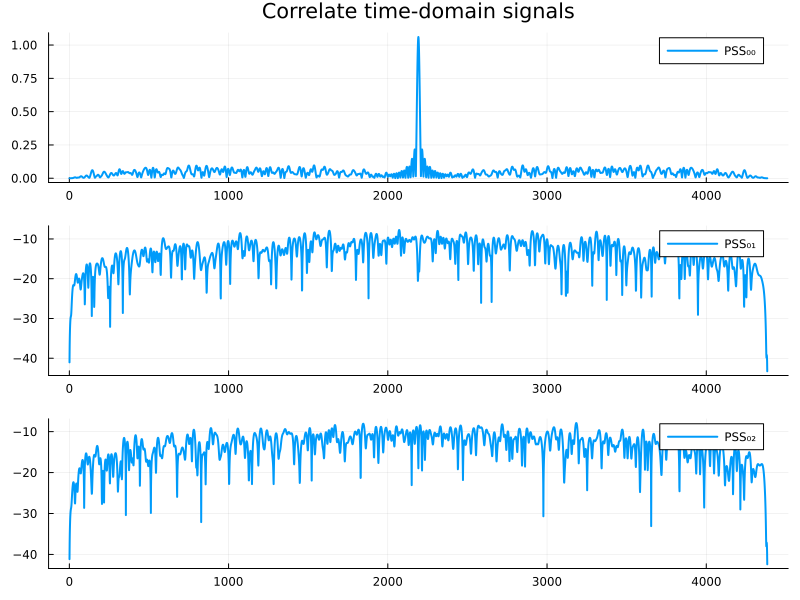

In [23]:
# Arrange subplots in a grid
plot(plot_pss00
    , plot_pss01
    , plot_pss02
    , layout=(3, 1)
    , legend = :topright
    , linewidth = 2 
    , size = ( 800, 600 )
)

In [24]:
# pss11 = xcorr(pss1_t,pss1_t); plot(abs(pss11))
PSS₁₁ = DSP.xcorr(sₚₛₛ¹,sₚₛₛ¹); plot_pss11 = plot(abs.(PSS₁₁), label="PSS₁₁", title = "Correlate time-domain signals");

In [25]:
# pss12 = xcorr(pss1_t,pss2_t); plot(10*log10(abs(pss12)))
PSS₁₂ = DSP.xcorr(sₚₛₛ¹,sₚₛₛ²); plot_pss12 = plot(10 * log10.(abs.(PSS₁₂)), label="PSS₁₂");

In [26]:
# pss22 = xcorr(pss2_t,pss2_t); plot(abs(pss22))
PSS₂₂ = DSP.xcorr(sₚₛₛ²,sₚₛₛ²); plot_pss22 = plot(abs.(PSS₂₂), label="PSS₂₂");

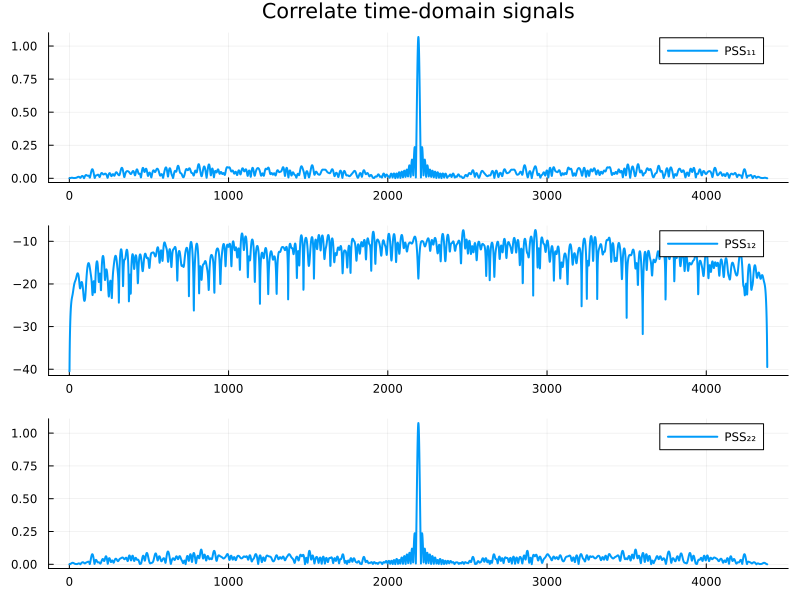

In [27]:
# Arrange subplots in a grid
plot(plot_pss11
    , plot_pss12
    , plot_pss22
    , layout=(3, 1)
    , legend = :topright
    , linewidth = 2 
    , size = ( 800, 600 )
)

### &#x0031;&#xFE0F;&#x20E3;.&#x0032;&#xFE0F;&#x20E3; Channel Model

The received signal is assumed to be of the form

$$y(n) = e^{2 \pi j \Delta f n}\tilde{s}_{PSS,i}(n) ∗ h(n) + z(n)$$

where $h(n)$ is assumed to have a finite-impulse channel which is unknown to the receiver, $z(n)$ is complex circularly-symmetric and additive white Gaussian noise, and $\Delta f$ is an unknown frequency-offset. We can assume that the channel is of the form

$$h(n)= \sum_{l=−⌈L/2⌉+1}^{⌊L/2⌋} a_l \delta(n −Nf −l)$$

for some even number $L$. The $a_l$ are complex amplitudes _unknown to the receiver_ and $Nf$ is a presentation of the unknown timing offset between the transmitter and receiver.

#### &#x0031;&#xFE0F;&#x20E3;.&#x0032;&#xFE0F;&#x20E3;.&#x0031;&#xFE0F;&#x20E3;  Questions

&#x0031;&#xFE0F;&#x20E3; You have been provided several signal snapshots with different channel realizations as MATLAB signals

&#x1F4D1; Note: the `Julia` files translating the `MATLAB` files are located under the `../data/julia` directory. The `Julia` files are just reading the `MATLAB`'s files by using the `MAT` Julia Library. 

Below a Julia source code example opening the `.mat` MATLAB original file and reading the `rxs0` and `rsx` signals.

```julia
using MAT

ff = matopen("../matlab/rxsignal_justnoise.mat");

@read ff rxs0;
@read ff rxs1;
```

The original `MATLAB` data files are located under the `../data/matlab` folder and have `NOT` been modified nor altered. 

In [28]:
## Receive the signal
include("../data/julia/rxsignal_justnoise.jl");

&#x0032;&#xFE0F;&#x20E3; Plot the time and frequency representations of the signals on a dB scale. What do you see?

In [29]:
## Assign the received signal to a variable sᵣₓ⁰
sᵣₓ⁰ = rxs0; # RX Received Signal 0 File Handle
@show size(sᵣₓ⁰), typeof(sᵣₓ⁰);

(size(sᵣₓ⁰), typeof(sᵣₓ⁰)) = ((614400, 1), Matrix{ComplexF64})


In [30]:
# Plot the result
m0_signal_plot = 
plot(10 * log10.(abs.( sᵣₓ⁰ ))
    , xlabel="Sample", ylabel="Power (dB)", title="Signal with noise"
    , ylim=(-20, 60)
    , size = (800,600)
    , label = "sᵣₓ⁰"
)
savefig(m0_signal_plot,"images/m0_signal_plot.png");

![title](images/m0_signal_plot.png)

&#x0033;&#xFE0F;&#x20E3;  Estimate the bandwidth of the received signal? What are the signal components that are located outside the band of interest?

&#x0034;&#xFE0F;&#x20E3; In your opinion what contributes to the ”changing shape” of the main signal component?

### &#x0031;&#xFE0F;&#x20E3;.&#x0033;&#xFE0F;&#x20E3;  Receiver

The primary objective is to determine the most likely $i$, or index of the transmitted PSS. In addition we would like to have the best estimate of $N\mathcal{f}$ and $\Delta \mathcal{f}$ since these are required to detect the other signal components after the PSS (Lab session 2). This will be investigated in other lab sessions. There are different approaches to doing this, but here we will take the approach where Nf and ∆f are discretized and are detected in a similar fashion to $i$. Let us assume that $N\mathcal{f}$ is discretized to the resolution of one sample. Since the periodicity of the PSS is $N$ samples, $N\mathcal{f}$ can assume the values ${0, 1, · · · , N − 1}$. Although a purely continuous random variable, we will also discretize $\Delta \mathcal{f}$ as 

$$\Delta \mathcal{f} = m \Delta \mathcal{f}_{min}, m = − \Delta \mathcal{f}_{max}/\Delta \mathcal{f}_{min}, · · · , \Delta \mathcal{f}_{max}/\Delta \mathcal{f}_{min}$$

, where $\Delta \mathcal{f}_{max}$ is the largest frequency-offset we are likely to encounter. Under these assumptions we will consider the following detection rule for the triple $(i, N\mathcal{f} , m)$

$$(\hat{i},\hat{N}\mathcal{f},\hat{m}) = argmax \; Y(i, N\mathcal{f} , m)$$

where $Y (i, N\mathcal{f} , m)$ will be chosent as the following statistic:

$$Y (i, N\mathcal{f} , m) = \left| \sum_{n=0}^{N_{PSS - 1}}e^{- 2 \pi j n m \Delta \mathcal{f}_{min} / \mathcal{f}_s}x_i^* (n)y(n + Nf ) \right|^2 $$


#### &#x0031;&#xFE0F;&#x20E3;.&#x0033;&#xFE0F;&#x20E3;.&#x0031;&#xFE0F;&#x20E3; Questions

&#x0031;&#xFE0F;&#x20E3; How is the above statistic related to the maximum-likelihood detector we considered in class? What is the reason for the difference? Think about the simpler receiver where $L = 1$, $N\mathcal{f} = 0$ and $\Delta \mathcal{f} = 0$.

In [31]:
## Receive the signal
include("../data/julia/rxsignal_withchannelandfreqoff.jl");

&#x1F4D1; Note: the `Julia` files translating the `MATLAB` files are located under the `../data/julia` directory. The `Julia` files are just reading the `MATLAB`'s files by using the `MAT` Julia Library. 

Below a Julia source code example opening the `.mat` MATLAB original file and reading the `rxs3` signal.

```julia
using MAT

ff = matopen("../data/matlab/rxsignal_withchannelandfreqoff.mat");

@read ff rxs3;
```

The original `MATLAB` data files are located under the `../data/matlab` folder and have `NOT` been modified nor altered. 

In [32]:
## Load the reference signal
include("../data/julia/pss2.jl");

In [33]:
using FFTW

In [34]:
## Assign the received signal a variable sᵣₓ³
sᵣₓ³ = rxs3; # RX Received Signal 3 File Handle
@show size(sᵣₓ³), typeof(sᵣₓ³);

(size(sᵣₓ³), typeof(sᵣₓ³)) = ((616447, 1), Matrix{ComplexF64})


In [35]:
using LinearAlgebra

In [36]:
## Assign the reference signal to a variable s̃ₚₛₛ²
## convert the signal in time domain
s̃ₚₛₛ² = pss_2;      # file handle #typed H\overbar 
s̃ₚₛₛ² = 𝓕⁻¹(s̃ₚₛₛ²);   # (inverse fourier transform) in time domain typed s\tilde
s̃ₚₛₛ² ./= |₂(s̃ₚₛₛ²);  @show size(s̃ₚₛₛ²), 𝐶ₚ-1    # Normalize
s̃ₚₛₛ² = s̃ₚₛₛ²[(end-(𝐶ₚ-1)):end] ⧺ s̃ₚₛₛ² # align verticaly end is 2048 FFT size
@show size(s̃ₚₛₛ²), typeof(s̃ₚₛₛ²); 

(size(s̃ₚₛₛ²), 𝐶ₚ - 1) = ((2048,), 143)
(size(s̃ₚₛₛ²), typeof(s̃ₚₛₛ²)) = ((2192,), Vector{ComplexF64})


In [37]:
## Prepare the reference signal for convolution
s̃ₚₛₛ²ˣ = (⦰(s̃ₚₛₛ²))ˣ; # reverse conjugate in one operation otherwise can lose peak
@show length(s̃ₚₛₛ²ˣ), typeof(s̃ₚₛₛ²ˣ);

(length(s̃ₚₛₛ²ˣ), typeof(s̃ₚₛₛ²ˣ)) = (2192, Vector{ComplexF64})


In [38]:
## Perform the convolution between the 2 signals
rᵣₓ³ = 10 * log10.(abs.( sᵣₓ³ ⊗ s̃ₚₛₛ²ˣ ))
@show size( rᵣₓ³ ), typeof(rᵣₓ³); 

(size(rᵣₓ³), typeof(rᵣₓ³)) = ((618638, 1), Matrix{Float64})


In [39]:
# Find maximum value and its index
# This part is blurry and needs to be correlated to the TP1 Handout explanation
# to determine the right variable naming
Ĉᵩ², 𝑁̂𝑓² = argmax(rᵣₓ³); @show Ĉᵩ², 𝑁̂𝑓²;
N𝑓 = getindex(𝑁̂𝑓², 1) - length(s̃ₚₛₛ²) + 1; @show N𝑓, getindex(𝑁̂𝑓², 1);

(Ĉᵩ², 𝑁̂𝑓²) = (50.649042476081405, CartesianIndex(6628, 1))
(N𝑓, getindex(𝑁̂𝑓², 1)) = (4437, 6628)


In [40]:
# Plot the result and notice the peak at 50
m3_chan_plot = 
plot(rᵣₓ³, xlabel="Sample", ylabel="Power (dB)", title="Convolution Result"
    , label = "rᵣₓ³"
    , ylim=(-20, 60), size = (800,600))
savefig(m3_chan_plot,"images/m3_chan_plot.png");

![title](images/m3_chan_plot.png)

In [41]:
### Set the variables from the TP Handout

In [42]:
𝑓ₛ = 61.44e6 # Msamples/s.

Δ𝑓ₘᵢₙ =    10.0 
𝑓₋    = -7500.     # f_min
𝑓₊    =  7500.     # f_max
m     = 𝑓₋:Δ𝑓ₘᵢₙ:𝑓₊

Nₒₛ = 2048; @show Nₒₛ;  # OFDM Symbol Size

Nₒₛ = 2048


##### Frequency Offset Estimator Function

![title](images/IMG_0123_cutoff.png)

In [43]:
########################################################
# Frequency Offset Estimator Function
# Translated from Matlab's function during class
# Trying to keep the prof's one-liner code in Julia 
# See last line in the above picture
########################################################
function freq_offset_est(sₚₛₛ, hₚₛₛ, Nf, m, 𝑓ₛ)

    # Frequency offset estimator
    Y = zeros(Float64, length(m));
    L = length(hₚₛₛ)
    t = 0:(1/𝑓ₛ):((L-1)/𝑓ₛ)

    for i = 1:length(m)
        # vec() denotes the operation of reshaping a sequence into a one-dimensional vector
        # in Matlab it is the .' (per element transpose)
        # (.)ˣ is the conjugate operation
        Y[i] += abs2.( ∑( exp.(-2π * j * m[i] .*t ) .* (hₚₛₛ)ˣ .* vec(sₚₛₛ[Nf:(Nf + L -1)])));
    end

    A𝑓ₒ, 𝑓ₒ = argmax(Y) # Frequency Offset Ampitude, Index and adjusted signal

    return m[𝑓ₒ], A𝑓ₒ, 𝑓ₒ, Y # m[𝑓ₒ] Index of the transmitted PSS in Hz
end

freq_offset_est (generic function with 1 method)

In [44]:
# Grab the Prof's Frequency Offset function with his values
i, A𝑓ₒ, 𝑓ₒ, Y = freq_offset_est(sᵣₓ³, s̃ₚₛₛ², N𝑓, m, 𝑓ₛ); @show i, 10 * log10(A𝑓ₒ), 𝑓ₒ;

(i, 10 * log10(A𝑓ₒ), 𝑓ₒ) = (340.0, 101.30016881425944, 785)


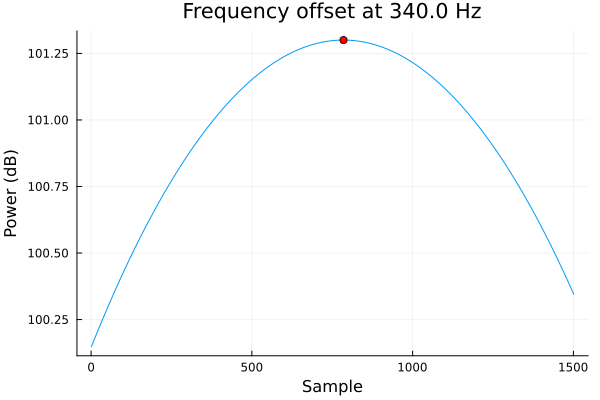

In [45]:
cfo_estim_plot = 
plot(10 * log10.(abs.(Y))
    , xlabel="Sample"
    , ylabel="Power (dB)"
    , title="Frequency offset at $i Hz"
)
scatter!((𝑓ₒ, (10 * log10(A𝑓ₒ))), color="red", label=:none, legend=:none)

## &#x0032;&#xFE0F;&#x20E3;  MATLAB Files

The supplied MATLAB/OCTAVE files are
1. pss.m - generates the three PSS signals for fs bandwidth
2. TP1 top.m - skeleton of your exercise that should be completed

```matlab
%Generate the PSS signals (pss0_t,pss1_t,pss2_t)
pss

% Do section 1.1 work here


% Read in sample file (example here)
fd = fopen('data/usrp_samples.dat','r') ; 
s = fread(fd,153600*2,'int16') ; 
fclose(fd) ; 
s2 = s(1:2:end) + sqrt(-1)*s(2:2:end) ; 


%plot an approximation to the power spectrum
figure(1)
f = linspace(-7.68e6,7.68e6,153600);
plot(f,20*log10(abs(fftshift(fft(s2)))))
axis([-7.68e6 7.68e6 100 150])


% Do Sections 1.2 and 1.3 work hre
```

In [46]:
s = read("../data/usrp_samples.dat");
s2 = s[1:2:end] + im * s[2:2:end];

In [47]:
Y_size = 153600
f = range(-7.68e6, stop=7.68e6, length=Y_size); @show size(f), size(s2)
Y = 20 * log10.(abs.(fftshift(fft(s2[1:Y_size]))));

(size(f), size(s2)) = ((153600,), (307200,))


In [48]:
# Plot an approximation to the power spectrum
usrp_samples = 
plot(f, Y
    ,labels = :false
    , grid = :true
    , title = "Periodogram Using FFT"
    , xlabel = "Frequency (Hz)"
    , ylabel = "Power/Frequency (dB/Hz)"
    , xlims = (-7.68e6, 7.68e6)
    , ylims = (30, 150)
    , linewidth = 2
    , size = ( 800, 600 )
)

savefig(usrp_samples,"images/usrp_samples.png");

![title](images/usrp_samples.png)

# &#x1F4DA; References

In signal processing, `fftshift` is an operation that shifts the zero frequency component (DC component) of the Fourier transform to the center of the spectrum. It is commonly used to visualize the spectrum in a more intuitive way.

In the provided code snippet `fftshift(fft(s2))`, it means:

- `fft(s2)`: This calculates the discrete Fourier transform (DFT) of the signal `s2`.
- `fftshift(...)`: This shifts the zero frequency component to the center of the spectrum.

In simpler terms, it rearranges the output of the Fourier transform so that low frequencies are in the center of the plot, making it easier to interpret the spectrum, especially in the context of symmetric signals.

The `20 * log10(abs(...))` part is used to convert the amplitude spectrum to decibels, which is a common practice in signal processing to represent the dynamic range of the spectrum in a more human-readable way.

"DC" stands for "Direct Current" in the context of electronics and signal processing. In the time-domain analysis of signals, DC refers to a constant voltage or current that does not vary with time. It represents the zero-frequency or constant component of a signal.

In the context of a signal's frequency spectrum, the term "DC component" specifically refers to the component at zero frequency. In mathematical terms, it corresponds to the average value or the coefficient of the constant term in the Fourier series or Fourier transform of a signal.

In summary, "DC" is associated with the constant part of a signal, and in the frequency domain, it refers to the zero-frequency component.

In Julia, the `vec` function is used to reshape a multi-dimensional array into a one-dimensional vector without copying the data. This function takes an array of any shape and returns a one-dimensional view of that array, essentially "flattening" it into a vector. The `vec` function is particularly useful when you need to perform operations that require a one-dimensional array or when interfacing with functions that expect a vector input.

Here's a simple example of how to use `vec`:

```julia
A = [1 2; 3 4]  # A 2x2 matrix
v = vec(A)       # Reshape A into a vector
```

After the operation, `v` will be:

```
4-element Array{Int64,1}:
 1
 3
 2
 4
```

It's important to note that `vec` does not copy the array's data; it simply changes the view of the array to a one-dimensional format. This makes `vec` a very efficient operation in terms of both speed and memory usage because it doesn't involve reallocating memory or moving data.

Additionally, since `vec` is a view, changes made to the elements of the returned vector will reflect in the original array, and vice versa, because they share the same underlying data.

The Fourier transform is a mathematical operation that transforms a function of time (a signal) into a function of frequency. It's used to analyze the frequencies contained in a signal. The notation for the Fourier transform varies slightly depending on the context, but a common representation is as follows:

- **Time Domain to Frequency Domain:** The Fourier transform of a time-domain function $f(t)$ is denoted by $F(\omega)$ or $\hat{f}(\omega)$, where $\omega$ is the angular frequency. The transformation is given by:

$$ F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} \, dt $$

- **Frequency Domain to Time Domain:** The inverse Fourier transform allows you to go back from the frequency domain to the time domain. If $F(\omega)$ is the Fourier transform of $f(t)$, then $f(t)$ can be recovered by:

$$ f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i\omega t} \, d\omega $$

In these expressions:
$f(t)$ is the original function in the time domain.
$F(\omega)$ is the Fourier transform of $f(t)$, representing the function in the frequency domain.
$e^{-i\omega t}$ and $e^{i\omega t}$ are complex exponentials, where $i$ is the imaginary unit, * $i^2 = -1$.
$t$ represents time, and $\omega$ represents angular frequency.
The integrals are taken over the entire range of $t$ and $\omega$, respectively, from $-\infty$ to $+\infty$.

This transformation allows the decomposition of a signal into its constituent frequencies, providing insight into the frequency components present in the time-domain signal.

Fourier Transform and Inverse Fourier Transform
- The process of converting a time-domain signal $s(t)$ into its frequency-domain representation $S(f)$ is denoted by the Fourier Transform, represented as:
$S(f) = \mathcal{F}\{s(t)\}$

- Conversely, the process of converting a frequency-domain representation back into the time domain is denoted by the Inverse Fourier Transform, represented as:
$s(t) = \mathcal{F}^{-1}\{S(f)\}$

A Finite Impulse Response (FIR) channel is a signal processing system with a response that lasts for a finite number of samples after an impulse input. Key features include:

- **Finite Duration**: The impulse response zeroes out after a finite time, ensuring inherent stability.
- **Linear Phase**: Enables uniform time delay across all frequencies, critical for maintaining phase integrity in signals.
- **Design Flexibility**: Allows precise control over the filter response, suitable for custom specifications.
- **Implementation**: Utilizes a simple structure of delays, multipliers, and adders for digital signal processing.

Mathematically, the output $y[n]$ is the convolution of an input signal $x[n]$ with the system's impulse response $h[n]$, described as $y[n] = \sum_{k=0}^{N} h[k] \cdot x[n-k]$, where $N$ is the filter order.

FIR channels are widely applied in digital filtering, audio processing, communications for equalization and pulse shaping, and image processing for enhancement and edge detection.